## FINAL REPORT (FR)

## Due 30 April 2016 (Sunday, 11:59pm)

**Important Note:** Before uploading your midterm project on Canvas, please name your file as following:

*MT#_FirstLastName.ipynb*

where "#" denotes the midterm number, "FirstLastName" is the name of the student. Students are allowed to work in groups (2 or max. of 3 students). **Each student will hand in their own file**. If you work with another student, please write her/his name on top of the first cell (in a Markdown cell).

**Question (28 points): CHOOSE YOUR OWN COMPUTATIONAL INTELLIGENCE APPLICATION**

In this last exercise, you will choose your own CI application from one of the following main applications (Surrogate-based optimization can be coupled with the other two):

* Game AI
* 3D Printing
* Surrogate-based Optimization

You are already familiar with Game AI and 3D printing applications. You can get some ideas about the surrogate-based optimization from the following three papers (you can download them from [UT library](http://www.lib.utexas.edu/) with your EID):

* Y. Jin, [A comprehensive survey of fitness approximation in evolutionary computation](http://link.springer.com/article/10.1007%2Fs00500-003-0328-5), Soft Computing, Vol:9, Issue:1, 2005.
* A.I.J. Forrester, A.J. Keane, [Recent advances in surrogate-based optimization](http://www.sciencedirect.com/science/article/pii/S0376042108000766), Progress in Aerospace Sciences, Vol:45, 50-79, 2009.
* Y. Jin, [Surrogate-assisted evolutionary computation: Recent advances and future challenges](http://www.sciencedirect.com/science/article/pii/S2210650211000198), Swarm and Evolutionary Computation, 61-70, 2011.

One of the recent papers that we worked on can be found in this [link](https://docs.google.com/viewer?a=v&pid=sites&srcid=ZGVmYXVsdGRvbWFpbnxjZW1jdHV0dW18Z3g6MmVmY2Q1YjA0ZWVjNzE3MQ).

Some other interesting projects could be, but **not limited to**:

* Evolutionary multi-objective optimization (EMO) and its applications in games or 3D printing
* Evolutionary Many-objective optimization
* Use of different evolutionary algorithms: Genetic Programming, Evolution Strategies, Particle Swarm Optimization, Differential Evolution, CMA-ES, Estimation of Distribution Algorithms, etc. (most of these algorithms are avilable in DEAP)
* Approximation of 3D objects with cubes, spheres or any base hypercubes using evolutionary algorithms (needs integration of DEAP with OpenSCAD or programming an EA in OpenSCAD)
* Designing a 2D car with EAs to finish a given track in shorted amount of time (requires a physics engine)
* 3D printable walking or jumping objects (requires a physics engine)
* Designing 3D printable accessories using EAs (aesthetic measure is needed for the fitness calculation)
* Surrogate-based optimization using a physical simulation or analytical engineering design problem.
* Surrogate-based EMO.
* Surrogate-based optimization in high-dimensional search space (more than 15 or 20 dimensions).
* Robust optimization -- Optimization under uncertainties. For instance, you can investigate the variablity in 3D printing of gears and how to incorporate these variances while designing a reliable gear mechanism
* 3D printable lamp design --incorporating variable wall thickness (to control translucency). It may require a physics engine.

**IMPORTANT NOTES:** 

* You can discuss your final project with your friends or mentors, but you have to discuss about it with the instructor before working on it.
* Prepare your report in the following format.
* Write your report below this cell, not as part of the explanations of format or content.

**////////////////////////////////////////////////////////////////**

**FORMAT OF THE REPORT:**


**Abstract**: 

* **Briefly** explain the purpose of the exercise, the methodology you followed and the results you obtained. Only one paragraph.

**Introduction**:

* First paragraph: A short description (3-5 sentences) about your project.
* Second paragraph: A *detailed* description of the problem, related work found in the literature. A summary of the structure of your report (what will you be discussing in the upcoming sections?)
* Please don't forget to provide any references (**with corresponding numbers**) supporting your sentences.

**Methodology**:

* You are expected to use an evolutionary algorithm; please provide the details of your implementation (which operators you use?, how do you calculate the fitness values?, etc.)
* Please provide the statistics about your calculations.
* If you use a simulation, physics engine, analytical test problem or parametric design for 3D printing, give the detailed description of that.
* You can provide example figures about the problem.

**Results and Discussions**:

* You can provide a figure showing the fitness values versus generations. 
* Results obtained with different algorithm settings.

**Conclusions**:

* Wrap up your work like you do in Abstract section and provide detailed summary of the results. 
* If your approach didn't work, you can still give the arguments to help potential readers to avoid the same mistakes.

**References**:

* List your citations with the order of: Author1, Author2, "Title of the article", Name of the Journal or Conference that the paper published at, Pages, Year. 
* Start your references with numbers and use those numbers in the text.

**THANK YOU**

In [1]:
import numpy as np 
import pandas as pd

train = pd.read_csv('train.csv')
# create target 
y = np.array(train['label'], dtype=str)
# create input array 
X = np.array(train.drop('label', axis=1), dtype=float)
# normalize
X = X / 255
# select 75% for training, we will use the other 25% to test
train_size = int(X.shape[0] * .75)

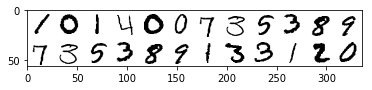

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

def gimg(i):
    # images must be 28x28x3
    return np.reshape(
        # greyscale images using the same value for R G B
        np.column_stack(
            (X[i], X[i], X[i])
        ),
        (28, 28, 3)
    )

# create the top 5
img = gimg(0)
for i in range(1, 12):
    img = np.column_stack((img, gimg(i)))
    
# create the bottom 5
img1 = gimg(6)
for i in range(7, 18):
    img1 = np.column_stack((img1, gimg(i)))

# add bottom to the top and swap sign 
img = 1 - np.row_stack((img, img1))

plt.imshow(img)

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
training_data = pca.fit_transform(X[:train_size], y[:train_size])

In [12]:
from sklearn.neural_network import MLPClassifier


#implement my own stochastic gradient descent...somehow. 

    

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, activation='relu', max_iter=3000,
                    hidden_layer_sizes=(54,), random_state=1)
clf.fit(training_data, y[:train_size].ravel())

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(54,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=3000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [13]:
from sklearn import metrics

predicted = clf.predict(pca.transform(X[train_size:]))
actual = y[train_size:]
#print(metrics.classification_report(actual, predicted))

matrix = metrics.confusion_matrix(actual, predicted)
sumMatrix = 0
for i in range(0,10):
    sumMatrix = sumMatrix + matrix[i][i]
    
print sumMatrix
print matrix



10150
[[1043    0    0    1    0    5   10    0    2    2]
 [   0 1162    5    1    1    1    0    4    7    1]
 [   6    1  966    8    1    1    6    9    5    2]
 [   3    2    9 1055    1    9    1    6   18    4]
 [   2    2    1    0  955    1    9    3    2   10]
 [   7    2    1   20    1  896    5    1    4    3]
 [   3    2    6    0    5    6 1019    1    0    0]
 [   4    0    9    5    1    2    0 1075    5   10]
 [   1    2    7    4    0   11    5    0  988    3]
 [   5    2    2    7    9    4    1   12   10  991]]
